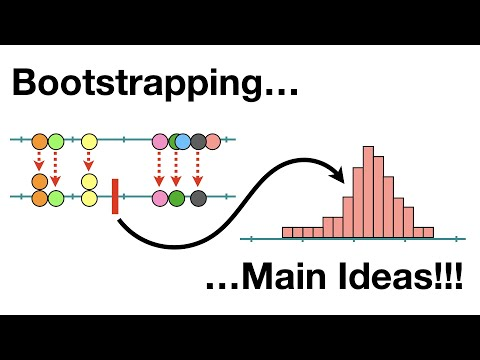

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

### 1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

The difference between these two is that the "standard deviation" represents how spread out the data of the actual population is, while the "standard error of the mean" aims to capture the variance of the sample mean across a large number of samples from that population. Standard deviation is a stastic taken directly from the population, while standard error of the mean is indicative of the samples that are being taken from the population.

### 2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

We know that, like the rule of standard deviations, 95% of our possible sample means will fall within 1.96 standard errors above or below the mean. Because of this, we can use the standard error of the mean to find the two fences within which 95% of the potential sample means will fall. We just need to take the median/mean of the sample means and add/subtract 1.96 * the standard error to get these fences.

### 3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

If we want to find a 95% confidence interval without using the standard error of the mean, we have to bootstrap a large amount of samples, and then sort the sample means. With the sample means sorted, we take the 2.5th percentile and the 97.5th percentile, and the area between those two will be the 95% confidence interval, as the middle 95% of sample means will fall within this interval.

### 4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

In [1]:
import numpy as np

# Sample data (replace this with your actual sample data)
data = np.array([12, 15, 14, 10, 13, 17, 19, 11, 16, 14])

# Number of bootstrap samples
n_bootstrap = 1000

# Function to calculate bootstrap confidence interval for any statistic
def bootstrap_confidence_interval(data, statistic_func, n_bootstrap=1000, ci_percentile=95):
    # Store bootstrap statistics
    bootstrap_stats = []
    
    # Create bootstrap samples and compute the statistic for each sample
    for _ in range(n_bootstrap):
        # Generate a bootstrap sample by sampling with replacement
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        
        # Compute the statistic (mean, median, etc.) for the bootstrap sample
        bootstrap_stat = statistic_func(bootstrap_sample)
        
        # Store the statistic
        bootstrap_stats.append(bootstrap_stat)
    
    # Calculate the lower and upper percentiles for the confidence interval
    lower_bound = (100 - ci_percentile) / 2
    upper_bound = 100 - lower_bound
    
    # Calculate the confidence interval
    ci_lower = np.percentile(bootstrap_stats, lower_bound)
    ci_upper = np.percentile(bootstrap_stats, upper_bound)
    
    return ci_lower, ci_upper

# Calculate a 95% confidence interval for the population mean
mean_ci = bootstrap_confidence_interval(data, np.mean, n_bootstrap, 95)
print(f"95% Bootstrap Confidence Interval for the Mean: {mean_ci}")

# To calculate a 95% confidence interval for the median instead of the mean:
median_ci = bootstrap_confidence_interval(data, np.median, n_bootstrap, 95)
print(f"95% Bootstrap Confidence Interval for the Median: {median_ci}")


95% Bootstrap Confidence Interval for the Mean: (12.5, 15.8)
95% Bootstrap Confidence Interval for the Median: (12.0, 16.0)


We can use this code to get other statistics, like standard deviation or variance:

In [3]:
variance_ci = bootstrap_confidence_interval(data, np.var, n_bootstrap, 95)
print(f"95% Bootstrap Confidence Interval for the Variance: {variance_ci}")

std_ci = bootstrap_confidence_interval(data, np.std, n_bootstrap, 95)
print(f"95% Bootstrap Confidence Interval for the Standard Deviation: {std_ci}")

95% Bootstrap Confidence Interval for the Variance: (2.03925, 11.364999999999995)
95% Bootstrap Confidence Interval for the Standard Deviation: (1.482901051125402, 3.324566642468409)


### 5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

Essentially, a population parameter is the "true" value for a measure of the population, such as mean, median, standard deviation, or IQR. This information is representative of every single individual within the population. A sample statistic is a measure taken from a sample out of the population. Taking the mean of a sample will not give us a definitive mean for the population, but by increasing sample size or number of samples, we can get an increasingly accurate estimate of where the "true" population mean is. Essentially, samples are not indicative of the entire population, but can help us get an idea of what the true population parameters may look like.

### 6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.

**What is the process of bootstrapping?**

We start with a set of data that we have collected from a population. From there, we can draw new samples of the same size from the set of data points we have already collected. By allowing a data point to be selected more than once in our new samples, we are able to create a very diverse set of "new" samples. By looking at details about certain statistics across all of these bootstrapped samples, we can make estimations of population parameters.

**What is the main purpose of bootstrapping?**

Bootstapping will allow us to make estimates (confidence intervals) of measures of the entire population. Why this is helpful is that it allows us to account for unevenness in our data and start to make predictions about population parameters without taking a larger sample (which could be expensive and time consuming).

**If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?**

First, we would want to establish a certain level of confidence that we wanted for our answer. For simplicity, we can choose 95%. From there, we could bootstrap the sample of size n, plot a graph of the means of all the samples, and make a 95% confidence interval of the means, by deciding where the middle 95% of the means we generated were. Then, if the hypothesized mean that we had started with was within the confidence interval, we could say that we were 95% confident that our hypothesized mean was plausible. Note: we would not say that we were 95% confident that our hypothesized guess was right, as we only determined whether or not our guess was within the range of plausible values.

### 7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

Because zero lies within our confidence interval, it is plausible that the population mean actually is zero, which means that we could not reject the null hypothesis. On the other hand, if the confidence interval did not contain zero, we could reject the null hypothesis, as it would be implausible for zero to be the true population mean.

### 8. Complete the following assignment.

### Vaccine Data Analysis Assignment

**Overview**

The company AliTech has created a new vaccine that aims to improve the health of the people who take it. Your job is to use what you have learned in the course to give evidence for whether or not the vaccine is effective.

Data AliTech has released the following data.

csv
PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84

**Deliverables** 

While you can choose how to approach this project, the most obvious path would be to use bootstrapping, follow the analysis presented in the "Pre-lecture" HW video (above). Nonetheless, we are primarily interested in evaluating your report relative to the following deliverables.

* A visual presentation giving some initial insight into the comparison of interest.
* A quantitative analysis of the data and an explanation of the method and purpose of this method.
* A conclusion regarding a null hypothesis of "no effect" after analyzing the data with your methodology.
* The clarity of your documentation, code, and written report.

**Response**

To analyze the data given and the problem at hand, we first need to understand what it is we are looking for. The variable that we should be analyzing is the amount of change from the initial to the final health score, as we are trying to prove definitively that this vaccine will lead to an improvement in health. 

We should first establish our hypotheses:

Null: The vaccine will have no effect on health score
Alternative: The vaccine will improve health score

Because the null hypothesis is essentially arguing that FinalHealthScore - InitialHealthScore will be equal to 0, we should create a new variable: Change in HealthScore or "ChangeHealth"

Let's calculate those values for each patient:

1: 86 - 84 = 2
2: 86 - 78 = 8
3: 80 - 83 = -3
4: 86 - 81 = 5
5: 84 - 81 = 3
6: 86 - 80 = 6
7: 86 - 79 = 7
8: 82 - 85 = -3
9: 83 - 76 = 7
10:84 - 83 = 1

Now the null hypothesis can be written as:

Null: ChangeHealth = 0

Once again, this means that the null hypothesis is that the vaccine will not cause a change in health.

In [2]:
#Creating CSV file:

import csv

# Data to be written to the CSV file (as a list of lists)
data = [
    ["PatientID", "Age", "Gender", "ChangeHealth"],
    [1, 45, "M", 2],
    [2, 34, "F", 8],
    [3, 29, "M", (-3)],
    [4, 52, "F", 5],
    [5, 37, "M", 3],
    [6, 41, "F", 6],
    [7, 33, "M", 7],
    [8, 48, "F", (-3)],
    [9, 26, "M", 7],
    [10, 39, "F", 1]
]

# Name of the file to create
filename = "patient_data.csv"

# Write data to a CSV file
with open(filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    # Write the header row
    writer.writerow(data[0])
    # Write the remaining rows
    writer.writerows(data[1:])

print(f"CSV file '{filename}' created successfully.")

CSV file 'patient_data.csv' created successfully.


Next, lets take a quick look at the initial sample, and then bootstrap the data. I had ChatGPT write me up a code to quickly visualize both of these data distributions. By bootstrapping the data, we can get ready to make a confidence interval of the sample means that we collect.

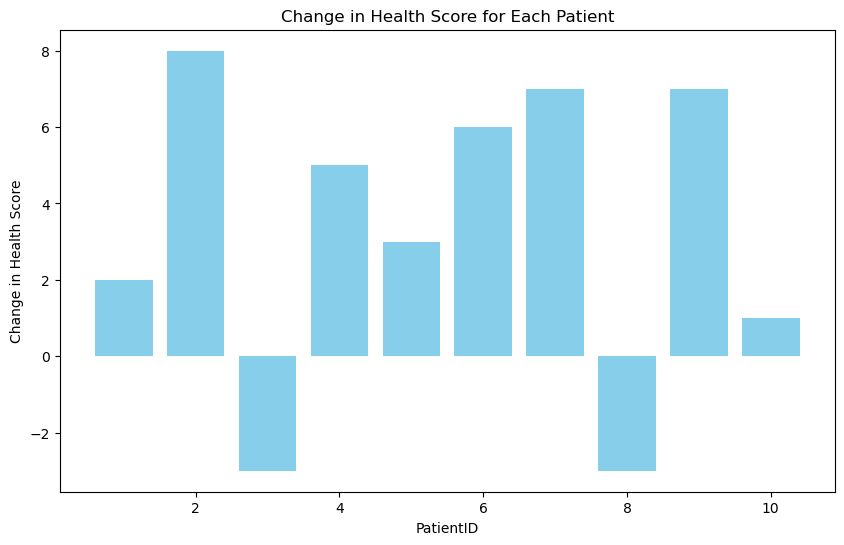

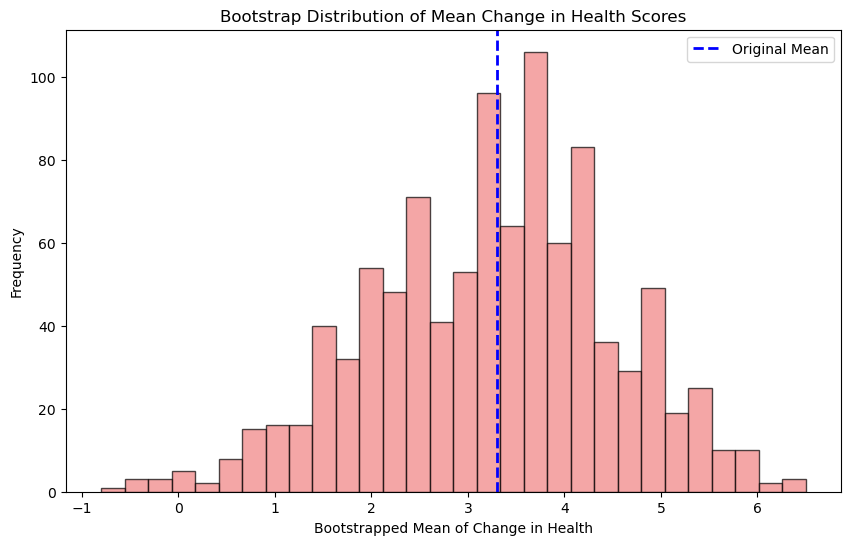

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "ChangeHealth": [2, 8, -3, 5, 3, 6, 7, -3, 7, 1]
}

# Step 1: Create a bar chart for the original data (ChangeHealth by PatientID)
plt.figure(figsize=(10, 6))
plt.bar(data["PatientID"], data["ChangeHealth"], color="skyblue")
plt.xlabel('PatientID')
plt.ylabel('Change in Health Score')
plt.title('Change in Health Score for Each Patient')
plt.show()

# Step 2: Bootstrap the sample for ChangeHealth
n_bootstrap = 1000  # Number of bootstrap samples
bootstrap_means = []

for _ in range(n_bootstrap):
    # Resample ChangeHealth with replacement
    bootstrap_sample = random.choices(data["ChangeHealth"], k=len(data["ChangeHealth"]))
    # Compute the mean of the bootstrap sample
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means.append(bootstrap_mean)

# Step 3: Create a histogram of the bootstrapped means
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color="lightcoral", edgecolor="black", alpha=0.7)
plt.axvline(np.mean(data["ChangeHealth"]), color='blue', linestyle='dashed', linewidth=2, label="Original Mean")
plt.xlabel('Bootstrapped Mean of Change in Health')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Mean Change in Health Scores')
plt.legend()
plt.show()


Next, we are going to take a 95% confidence interval from the means of the bootstrapped data. With this interval we can say that we are 95% confident that the population mean (the true average result of the vaccine) falls within our interval. If 0 is within the interval, then it is plausible that 0 could be the true population mean, meaning that we fail to reject the null hypothesis. However, if 0 is not within the interval, then we can say that it is implausible that the true population mean would be zero, and we can reject the null hypothesis.

95% Confidence Interval for the Mean: [0.7, 5.502499999999998]


TypeError: show() got an unexpected keyword argument 'renderer'

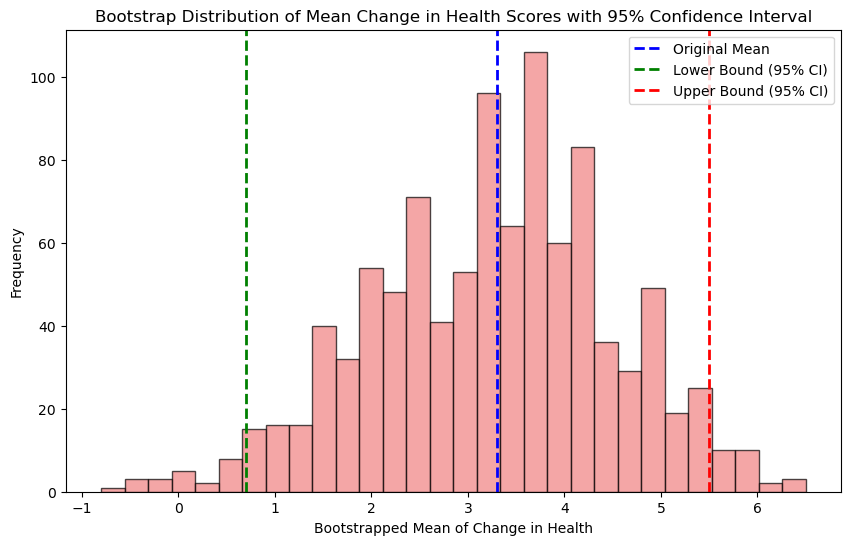

In [5]:
lower_bound = np.percentile(bootstrap_means, 2.5)  # 2.5th percentile
upper_bound = np.percentile(bootstrap_means, 97.5)  # 97.5th percentile
print(f"95% Confidence Interval for the Mean: [{lower_bound}, {upper_bound}]")


plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color="lightcoral", edgecolor="black", alpha=0.7)
plt.axvline(np.mean(data["ChangeHealth"]), color='blue', linestyle='dashed', linewidth=2, label="Original Mean")
plt.axvline(lower_bound, color='green', linestyle='dashed', linewidth=2, label="Lower Bound (95% CI)")
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2, label="Upper Bound (95% CI)")
plt.xlabel('Bootstrapped Mean of Change in Health')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Mean Change in Health Scores with 95% Confidence Interval')
plt.legend()
plt.show()

We can establish the confidence interval from our bootstrapped data to be [0.7, 5.502499999999998]. Because 0 does not lie within this interval, we can say that it is implausible for 0 to be the true population mean. As a result we can reject the null hypothesis.

By rejecting the null hypothesis we are denying the statement that the vaccine has no effect on health, and are essentially stating that we are confident that the vaccine will have a positive effect on health.

While we can reject the null hypothesis, we should also, however, consider how fully we should trust our data. With the subject being the health of individuals who take the vaccine, it is reasonable to perhaps want a larger confidence interval, or a larger sample size of the initial sample. The reason that medicine is so trustworthy is that it has to be tested with all due diligence before being used in a medical context. As a result, it would not hurt to repeat this experiment, if time and budget allowed.

### 9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes sir!

### ChatBot Summary

### Summary of Our Exchanges:

#### 1. **Difference Between Standard Error and Standard Deviation**:
   - **Standard Error of the Mean (SEM)**: Describes the variability of sample means from the population mean. It's calculated by dividing the standard deviation of the sample by the square root of the sample size (\(\frac{\sigma}{\sqrt{n}}\)).
   - **Standard Deviation (SD)**: Measures the spread of data points in a population around the population mean.

   In the context of **bootstrapping**, the SEM of the bootstrapped samples can be used to assess the variability of the estimated statistic (e.g., the mean).

---

#### 2. **Using Standard Error to Create a 95% Confidence Interval**:
   - To create a **95% confidence interval** using the SEM, multiply the SEM by 1.96 (since 95% of the data in a normal distribution is within 1.96 standard deviations from the mean).
   - The confidence interval is:  
     \[
     \text{CI} = \left[ \bar{x} - 1.96 \times \text{SEM}, \bar{x} + 1.96 \times \text{SEM} \right]
     \]
   - This will cover approximately 95% of the bootstrapped sample means.

---

#### 3. **Alternative Method to Create a 95% Bootstrapped Confidence Interval**:
   - Without using the SEM, you can create a 95% confidence interval by calculating the **2.5th percentile** and the **97.5th percentile** of the bootstrapped sample means.
   - This method gives the direct bounds of the confidence interval based on the empirical distribution of bootstrapped sample statistics.

---

#### 4. **Bootstrapping Confidence Interval for Population Parameters**:
   - We discussed and created Python code to bootstrap a dataset and calculate a **95% confidence interval** for the **mean** of the `ChangeHealth` data.
   - The code can easily be modified to calculate confidence intervals for other population parameters, such as the **median**, by changing the statistic computed in the bootstrap loop.

---

#### 5. **Purpose of Bootstrapping**:
   - The main purpose of bootstrapping is to **estimate the sampling distribution** of a statistic (e.g., mean, median) by resampling from the data with replacement. This allows you to:
     - Calculate **confidence intervals**.
     - Assess the **variability** of the estimated statistic.
     - Test the plausibility of a **hypothesized value** of the population parameter.

---

#### 6. **Testing a Hypothesis Using Bootstrapping**:
   - To assess whether a hypothesized population mean is plausible, you can:
     1. Bootstrap the sample and calculate the **confidence interval** for the mean.
     2. If the hypothesized value falls outside this interval, it may suggest that the hypothesized value is **unlikely** to be true given the data.

---

#### 7. **Creating a CSV File**:
   - We provided Python code to create a CSV file (`patient_data.csv`) with patient health data including columns for **PatientID**, **Age**, **Gender**, and **Change in Health**.

---

#### 8. **Visualizing Data and Bootstrapping**:
   - We developed Python code to:
     - **Visualize the original data** using a bar chart for `ChangeHealth` by `PatientID`.
     - **Bootstrap the data** for `ChangeHealth` and create a **histogram** of the bootstrapped sample means.
     - This allowed us to explore the **distribution** of the bootstrapped means.

---

#### 9. **Calculating a 95% Confidence Interval for Bootstrapped Means**:
   - Finally, we computed a **95% confidence interval** for the mean of `ChangeHealth` by calculating the **2.5th** and **97.5th percentiles** of the bootstrapped means. We also updated the histogram to include dashed lines indicating the **original mean** and the bounds of the confidence interval.

---

Let me know if you need any more details for your submission!

https://chatgpt.com/share/66fde99f-0628-8013-8116-e4d06efdd502